### <center>Abdul Aqil Murtadho</center>
#### <center>F1D022029</center>

# Here you can put your extraordinary code

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


Script diatas merupakan library yang digunkan dalam program. NumPy digunakan untuk komputasi array numerik, Matplotlib untuk visualisasi data dan OpenCV untuk pemrosesan gambar.

## Nomor 1

Perbaikilah kualitas citra dari gambar yang tersedia dengan menggunakan:

- Kernel 3x3 berisi 1/9 dengan metode Mean, Median dan Modus
- Kernel 9x9 dengan berisi 1/81 dengan metode yang sama seperti poin sebelumnya
- kernel 3x3 untuk melakukan sharpening dan smoothing dengan kernel yang berisi sebagai berikut

Script dibawah ini digunakan untuk mengambil gambar menggunakan "imread", kemudian di ubah menjadi citra grayscale. menggunakan "cv.COLOR_BGR2GRAY". kemudian menampilkan citra yang telah diubah ke greyscale menggunakan "imshow" dan mencetak nilai piksel menggunakan "print"

[[253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 ...
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]]


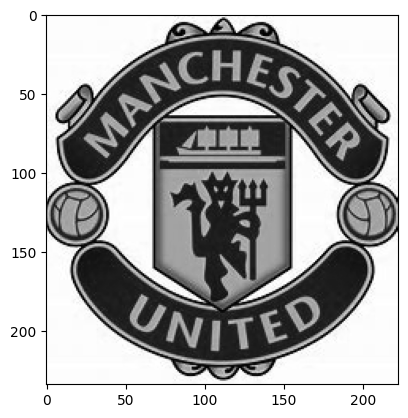

In [122]:
img = plt.imread('../assets/manchester_united.jpeg')
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
print(gray_img)

In [123]:
kernel1 = np.full((3,3), 1/9)
kernel2 = np.full((9,9), 1/81)

Script diatas digunakan untuk membuat dua kernel. yang pertama dengan ukuran 3x3 yang berisi full 1/9 dan yang kedua dengan ukuran 9x9 yang berisi full 1/81

In [124]:
def mean(image, kernel):
  heightImg, widthImg = image.shape
  heightKernel, widthKernel = kernel.shape
  heigthCenter = int((heightKernel - 1)/2)
  widthCenter = int((widthKernel - 1)/2)
  padKiri = widthCenter
  padKanan = widthKernel - widthCenter
  padAtas = heigthCenter
  padBawah = heightKernel - heigthCenter
  image = np.pad(image, ((padKiri, padKanan), (padAtas, padBawah)), mode='edge')
  hasil = np.zeros([heightImg, widthImg])

  for i in range(heightImg):
    for j in range(widthImg):
      penjumlahan = 0
      for k in range(heightKernel):
        for l in range(widthKernel):
          penjumlahan += image[i+k, j+l] * kernel[k, l]
      hasil[i, j] = penjumlahan 

  return hasil


Script diatas merupakan fungsi Mean. dimana fungsi tersebut menerima dua parameter yaitu image, kernel. kemudian fungsi ini akan mencari tinggi dan lebar gambar serta mencari tinggi dan lebar kernel. setelah itu, mencari tengah kernel dan mencari jumlah paddding yang diperlukan unuk mengisi ujung-ujung gambar. setelah itu fungsi ini melakukan kovolusi dengan mengalikan setiap elemen kernel dengan elemen gambar yang sesuai dan menjumlahkan hasilnyaaaa sehingga mendapakan hasil Mean dari sebuah citra.

Script dibawah ini memanggil fungsi mean kemudian parameternya akan diisi dengan gambar yang telah diubah ke grayscale dan menggunakan kernel 1 dan 2 yang telah ditentukan sebelumnya lalu menampilkan hasil dari mean sebuah citra

(-0.5, 222.5, 233.5, -0.5)

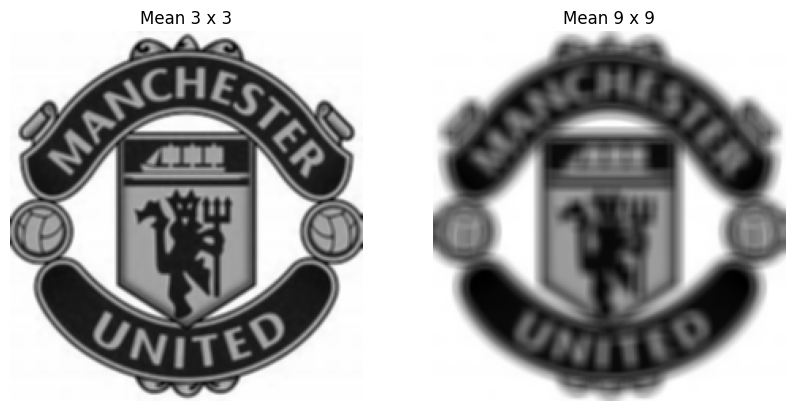

In [125]:
mean1 = mean(gray_img, kernel1)
mean2 = mean(gray_img, kernel2)

fig, ax=plt.subplots(1,2, figsize=(10,10))
ax[0].set_title('Mean 3 x 3')
ax[0].imshow(mean1, cmap='gray')
ax[0].axis('off')

ax[1].set_title('Mean 9 x 9')
ax[1].imshow(mean2, cmap='gray')
ax[1].axis('off')

In [126]:
def median(arr):
    banyakData = len(arr) 
    pengurutan = sorted(arr) 
    if banyakData % 2 == 0:
        median1 = pengurutan[banyakData//2]
        median2 = pengurutan[banyakData//2 - 1]
        median = (median1 + median2)/2
    else:
        median = pengurutan[banyakData//2]
    return median 

Script diatas merupakan fungsi untuk menghitung median (nilai tengah). pertama fungsi akan mencari banyaknya data array menggunakan fungsi len lalu mengurutkan data menggunakan fungsi sorted. pada fungsi tersebut, terdapat kondisi jika data dibagi 2 sisanya 0 maka median akan dicari dengan banyaknya data dibagi 2 selanjutnya banyaknya data dibagi 2-1. Hasil dari median akan ditambahkan lalu dibagi dengan 2 dan jika banyaknya data dibagi 2 sisanyan buka nol maka median langsung didapatkan dari banyaknya data dibagi 2

In [127]:
def filMedian(image, kernel):
    tinggiImg, lebarImg = image.shape 
    tinggiKernel, lebarKernel = kernel.shape 
    tinggiTengah = int((tinggiKernel - 1)/2) 
    lebarTengah = int((lebarKernel - 1)/2) 

    padKiri = lebarTengah
    padKanan = lebarKernel - lebarTengah
    padAtas = tinggiTengah
    padBawah = tinggiKernel - tinggiTengah
    image = np.pad(image, ((padKiri, padKanan), (padAtas, padBawah)), mode='edge')

    result = np.zeros([tinggiImg, lebarImg]) 
    for i in range(tinggiImg):
         for j in range(lebarImg):
             temp = np.zeros(len(kernel)*len(kernel))
             indeks = 0
             for k in range(tinggiKernel):
                 for l in range(lebarKernel):
                     temp[indeks] += image[i+k,j+l]
                     indeks+=1
                     result[i,j] = median(temp)
             
    return result 

Script diatas merupakan fungsi untuk mencari nilai tengah atau median dari sebuah citra. dimana fungsi tersebut menerima dua parameter yaitu image, kernel. kemudian fungsi ini akan mencari tinggi dan lebar gambar serta mencari tinggi dan lebar kernel. setelah itu, mencari tengah kernel dan mencari jumlah paddding yang diperlukan unuk mengisi ujung-ujung gambar. setelah itu fungsi ini memasukan data-data kernel ke variabel temp lalu mengurutkan data-data tersebut. kemudian mengihtung median dari data yang ada ditemp dan menyimpannya ke dalam variabel Result.

Script dibawah ini memanggil fungsi filmedian kemudian parameternya akan diisi dengan gambar yang telah diubah ke grayscale dan menggunakan kernel 1 dan 2 yang telah ditentukan sebelumnya lalu menampilkan hasil dari mediam sebuah citra

(-0.5, 222.5, 233.5, -0.5)

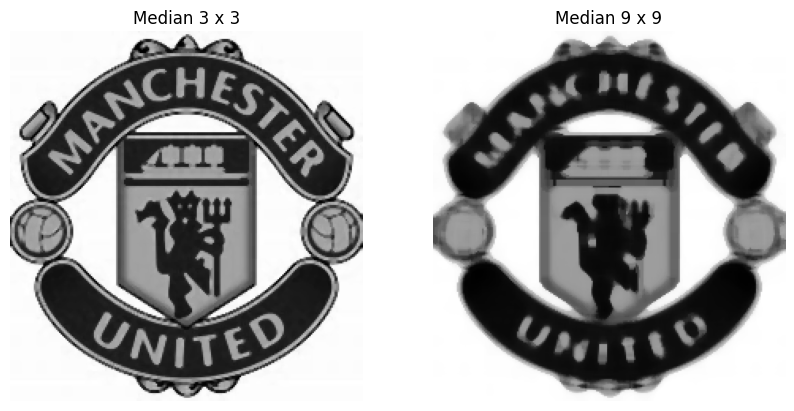

In [107]:
median1 = filMedian(gray_img, kernel1)
median2 = filMedian(gray_img, kernel2)

fig, ax=plt.subplots(1,2, figsize=(10,10))
ax[0].set_title('Median 3 x 3')
ax[0].imshow(median1, cmap='gray')
ax[0].axis('off')

ax[1].set_title('Median 9 x 9')
ax[1].imshow(median2, cmap='gray')
ax[1].axis('off')

In [108]:
def modus(arr):
    count = {}
    for num in arr:
        if num in count:
            count[num] += 1
        else:
            count[num] = 1
            
    numMax = 0
    modus = None
    for num, nilai in count.items():
        if nilai > numMax:
            numMax = nilai
            modus = num
    return modus 

Script diatas merupakan fungsi untuk menentukan nilai modus dari sebuah array. pertama terdapat variabel count untuk menghitung jumlah kemunculan nilai array. kemudian melakukan perulangan pada setuap nilai dan menambahkan jumlah kemunculan di variabel count. setelah itu perulangan dilakukan lagi unuk menyimpan nilai dengan jumlah kemunculan terbanyak ke variabel modus.

In [109]:
def filModus(image, kernel):
    tinggiImg, lebarImg = image.shape 
    tinggiKernel, lebarKernel = kernel.shape 
    tinggiTengah = int((tinggiKernel - 1)/2) 
    lebarTengah = int((lebarKernel - 1)/2) 

    padKiri = lebarTengah
    padKanan = (lebarKernel-1) - lebarTengah
    padAtas = tinggiTengah
    padBawah = (tinggiKernel-1) - tinggiTengah
    image = np.pad(image, ((padKiri, padKanan), (padAtas, padBawah)), mode='edge')

    result = np.zeros([tinggiImg, lebarImg]) 
    for i in range(tinggiImg):
         for j in range(lebarImg):
             temp = np.zeros(len(kernel)*len(kernel))
             indeks = 0
             for k in range(tinggiKernel):
                 for l in range(lebarKernel):
                     temp[indeks] += image[i+k,j+l]
                     indeks+=1
                     result[i,j] = modus(temp)
             
    return result 

Script diatas merupakan fungsi untuk mencari nilai dengan kemunculan terbanyak atau modus dari sebuah citra. dimana fungsi tersebut menerima dua parameter yaitu image, kernel. kemudian fungsi ini akan mencari tinggi dan lebar gambar serta mencari tinggi dan lebar kernel. setelah itu, mencari tengah kernel dan mencari jumlah paddding yang diperlukan unuk mengisi ujung-ujung gambar. setelah itu fungsi ini memasukan data-data kernel ke variabel temp lalu mengurutkan data-data tersebut. kemudian mengihtung nilai dengan kemunculan terbanyak dari data yang ada ditemp dan menyimpannya ke dalam variabel Result.

Script dibawah ini memanggil fungsi filmodus kemudian parameternya akan diisi dengan gambar yang telah diubah ke grayscale dan menggunakan kernel 1 dan 2 yang telah ditentukan sebelumnya lalu menampilkan hasil dari modus sebuah citra

(-0.5, 222.5, 233.5, -0.5)

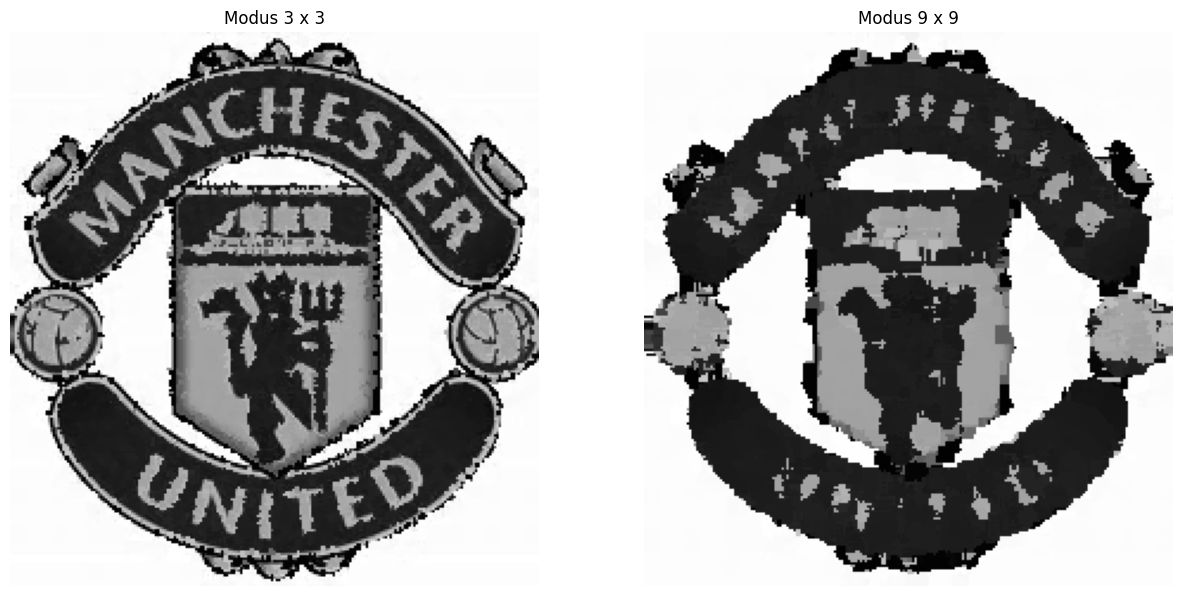

In [110]:
modus1 = filModus(gray_img, kernel1)
modus2 = filModus(gray_img, kernel2)

fig, ax=plt.subplots(1,2, figsize=(15,10))
ax[0].set_title('Modus 3 x 3')
ax[0].imshow(modus1, cmap='gray')
ax[0].axis('off')

ax[1].set_title('Modus 9 x 9')
ax[1].imshow(modus2, cmap='gray')
ax[1].axis('off')

In [111]:
kernel3 = np.array([[1/10, 1/10, 1/10],
                    [1/10, 1/5, 1/10],
                    [1/10, 1/10, 1/10]])

kernel4 = np.array([[1/9, 1/9, 1/9],
                    [1/9, 8/9, 1/9],
                    [1/9, 1/9, 1/9]])

Script diatas merupakan kernel yang akan digunakan untuk melakukan penghalusan dan penajaman citra. kernel 3 akan digunakan untuk melakukan sharpening atau penghalusan citra dan kernel 4 akan digunakan untuk melakukan penajaman atau smoothing citra.

In [112]:
def filter(image, kernel):
  heightImg, widthImg = image.shape
  heightKernel, widthKernel = kernel.shape
  heigthCenter = int((heightKernel - 1)/2)
  widthCenter = int((widthKernel - 1)/2)
  padKiri = widthCenter
  padKanan = widthKernel - widthCenter
  padAtas = heigthCenter
  padBawah = heightKernel - heigthCenter
  image = np.pad(image, ((padKiri, padKanan), (padAtas, padBawah)), mode='edge')
  hasil = np.zeros([heightImg, widthImg])

  for i in range(heightImg):
    for j in range(widthImg):
      perkalian = 0
      for k in range(heightKernel):
        for l in range(widthKernel):
          perkalian += image[i+k, j+l] * kernel[k, l]
      hasil[i, j] = perkalian 

  return hasil


Script diatas merupakan fungsi filter. dimana fungsi tersebut menerima dua parameter yaitu image, kernel. kemudian fungsi ini akan mencari tinggi dan lebar gambar serta mencari tinggi dan lebar kernel. setelah itu, mencari tengah kernel dan mencari jumlah paddding yang diperlukan unuk mengisi ujung-ujung gambar. setelah itu fungsi ini melakukan kovolusi dengan mengalikan setiap elemen kernel dengan elemen gambar yang sesuai dan menjumlahkan hasilnyaaaa sehingga mendapakan hasil dari konvolusi dari sebuah citra.

Script dibawah ini memanggil fungsi filter kemudian parameternya akan diisi dengan gambar yang telah diubah ke grayscale dan menggunakan kernel 3 dan 4 yang telah ditentukan sebelumnya lalu disimpan kedalam variabel sharpening untuk melakakukan penghalusan dan variable smoothing untuk melakukan penajaman serta menampilkan hasil dari citra yang telah di smoothing dan sherpening sebuah citra

(-0.5, 222.5, 233.5, -0.5)

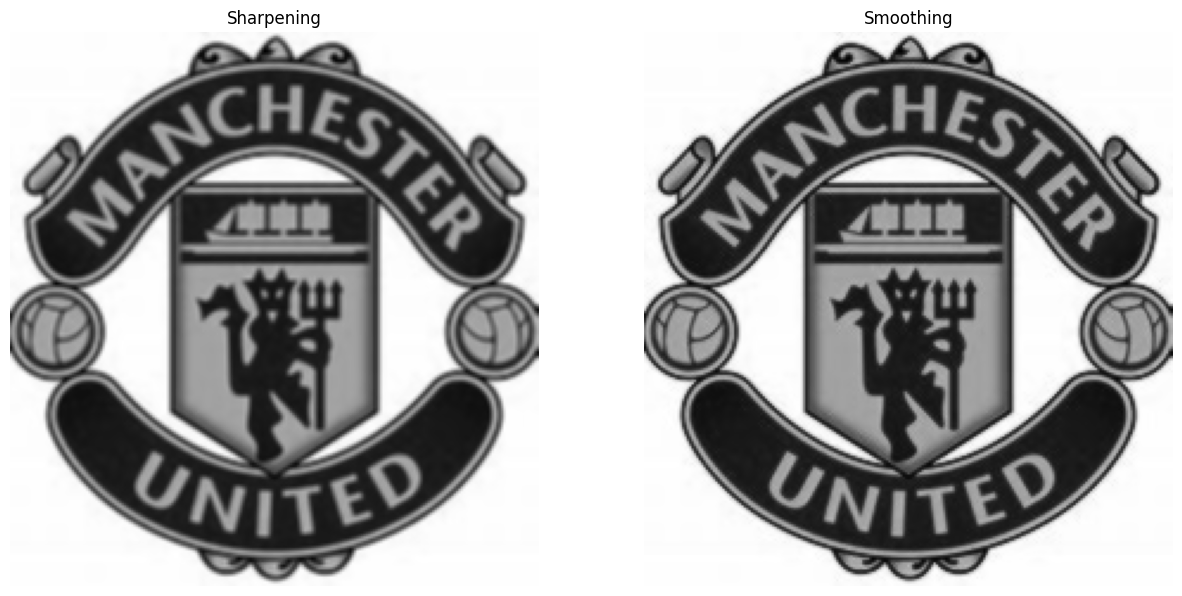

In [113]:
sharpening = filter(gray_img, kernel3)
smoothing = filter(gray_img, kernel4)

fig, ax=plt.subplots(1,2, figsize=(15,10))
ax[0].set_title('Sharpening')
ax[0].imshow(sharpening, cmap='gray') 
ax[0].axis('off')

ax[1].set_title('Smoothing')
ax[1].imshow(smoothing, cmap='gray')
ax[1].axis('off')

## Nomor 2
### Melakukan deteksi tepi untuk semua jenis perbaikan sebelumnya dengan operator Sobel, Prewitt dan Robert pada gambar

In [114]:
Sobelx = np.array([[-1, 0, 1], 
                   [-2, 0, 2], 
                   [-1, 0, 1]]) 
Sobely = np.array([[1, 2, 1], 
                   [0, 0, 0], 
                   [-1, -2, -1]]) 

Prewittx = np.array([[-1, 0, 1], 
                     [-1, 0, 1], 
                     [-1, 0, 1]]) 
Prewitty = np.array([[1, 1, 1], 
                     [0, 0, 0],
                     [-1, -1, -1]]) 

Robertx = np.array([[1, 0,], 
                    [0, -1]])
Roberty = np.array([[0, 1], 
                    [-1, 0]])

Script diatas merupakan kernel-kernel yang akan digunakan untuk mendeteksi tepi menggunakan metode sobel, prewitt, dan robert.

In [115]:
def konvolusi(image, kernel, padImg):
    result = np.zeros([image.shape[0], image.shape[1]])
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    result[i][j] += padImg[i+k, j+l] * kernel[k, l]
    return result

Script diatas merupakan fungsi konvolusi. fungsi ini menerima tiga parameter yaitu gambar asli, kernel yang akan digunakan konvolusi dan gambbar yang telah di padding. kemudian variabel result digunakan untuk menyimpan hasil dari konvolusi citra. selanjutnya terdapat perulangan untuk setiap nilai pixel dalam citra. nilai pixel gamabr yang telah dipadding akan dikalikan dengan kernel dan hasil perkalian disimpan kedalan variabel result.

In [116]:
def cariGradient (image, kernel): 
    centerx, centery = int((kernel.shape[0] - 1)/2), int((kernel.shape[1] - 1)/2)
    padImg =  np.pad(array = image, pad_width = ((centerx, kernel.shape[0]-1-centerx), (centery, kernel.shape[1]-1-centery)), mode ="constant") 
    return konvolusi(image, kernel, padImg)

Script diatas merupakan fungsi untuk mencari gradient pada citra menggunakan kernel yang ditentukan sebelumnnya. dalam fungsi ini akan ditentukan dulu titik tenga pada kernel. Lalu, gambar akan dilakukan padding disetiap sisi gambar yang ditentukan menggunakan tengah kernel. selanjutnya fungsi konvolusi akan dipanggil dengan parameter gambar, kernel, dan gambar yang telah dipadding.


In [117]:
def deteksiTepi(image, kernelx, kernely):
  resultx = cariGradient(image, kernelx)
  resulty = cariGradient(image, kernely)
  result = abs(resultx) + abs(resulty)
  return result

Script diatas merupakan fungsi deteksiTepi untuk melakukan proses deteksi tepi dengan menggunakan parameter gambar, kernel horizontal dan kernel vertikal. lalu mencari gradien setiap kernel baik horizontal maupu verikal lalu digabungkan dengan nilai mutlak sehingga menghasilkan deteksi tepi yang diinginkan.

Script dibawah ini digunakan untuk menampilkan hasil deteksi tepi menggunakan metode sobel. Script dibawh ini juga, menampilkan hasil perbaikan kualitas citra dengan menampilkan hasil mean, median, modus dengan kernel 3x3 dan 9x9. serta menampilkan hasil sharpening atau penghalusan citra dan smoothing atau penajaman citra.

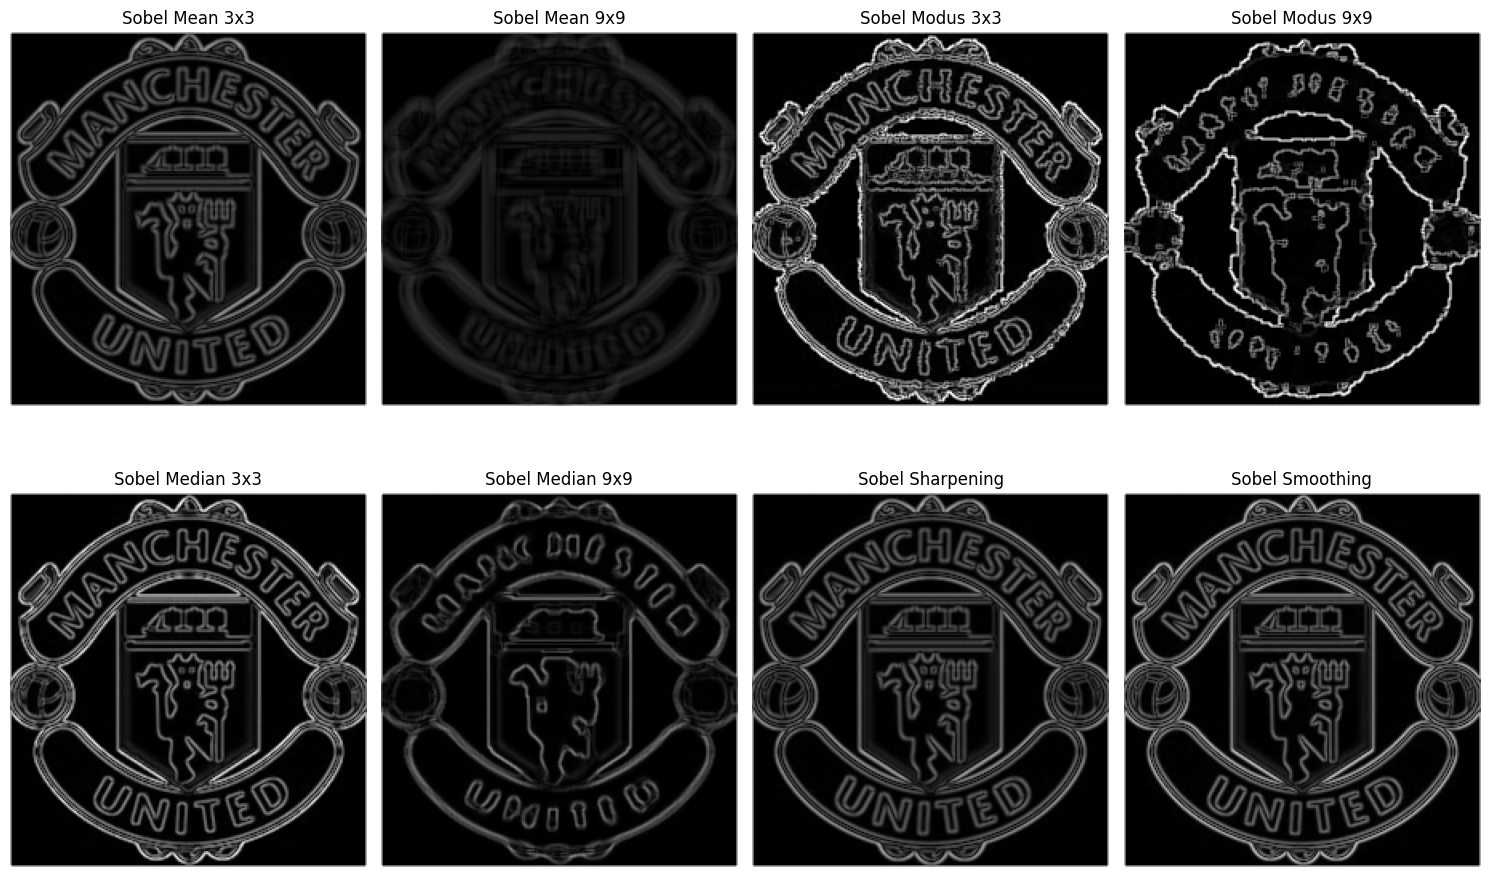

In [118]:
plt.figure(figsize=(15, 10))
sobelMean3 = deteksiTepi(mean1, Sobelx, Sobely)
plt.subplot(241)
plt.imshow(sobelMean3, cmap='gray')
plt.title('Sobel Mean 3x3')
plt.axis("off")

sobelMean9 = deteksiTepi(mean2, Sobelx, Sobely)
plt.subplot(242)
plt.imshow(sobelMean9, cmap='gray')
plt.title('Sobel Mean 9x9')
plt.axis("off")

sobelModus3 = deteksiTepi(modus1, Sobelx, Sobely)
plt.subplot(243)
plt.imshow(sobelModus3, cmap='gray')
plt.title('Sobel Modus 3x3')
plt.axis("off")

sobelModus9 = deteksiTepi(modus2, Sobelx, Sobely)
plt.subplot(244)
plt.imshow(sobelModus9, cmap='gray')
plt.title('Sobel Modus 9x9')
plt.axis("off")

sobelMedian3 = deteksiTepi(median1, Sobelx, Sobely)
plt.subplot(245)
plt.imshow(sobelMedian3, cmap='gray')
plt.title('Sobel Median 3x3')
plt.axis("off")

sobelMedian9 = deteksiTepi(median2, Sobelx, Sobely)
plt.subplot(246)
plt.imshow(sobelMedian9, cmap='gray')
plt.title('Sobel Median 9x9')
plt.axis("off")

sobelSharpening = deteksiTepi(sharpening, Sobelx, Sobely)
plt.subplot(247)
plt.imshow(sobelSharp, cmap='gray')
plt.title('Sobel Sharpening'), plt.axis("off")

sobelSmoothing = deteksiTepi(smoothing, Sobelx, Sobely)
plt.subplot(248)
plt.imshow(sobelSmooth, cmap='gray')
plt.title('Sobel Smoothing'), plt.axis("off")

plt.tight_layout()
plt.show()

Script dibawah ini digunakan untuk menampilkan hasil deteksi tepi menggunakan metode Prewitt. Script dibawh ini juga, menampilkan hasil perbaikan kualitas citra dengan menampilkan hasil mean, median, modus dengan kernel 3x3 dan 9x9. serta menampilkan hasil sharpening atau penghalusan citra dan smoothing atau penajaman citra.

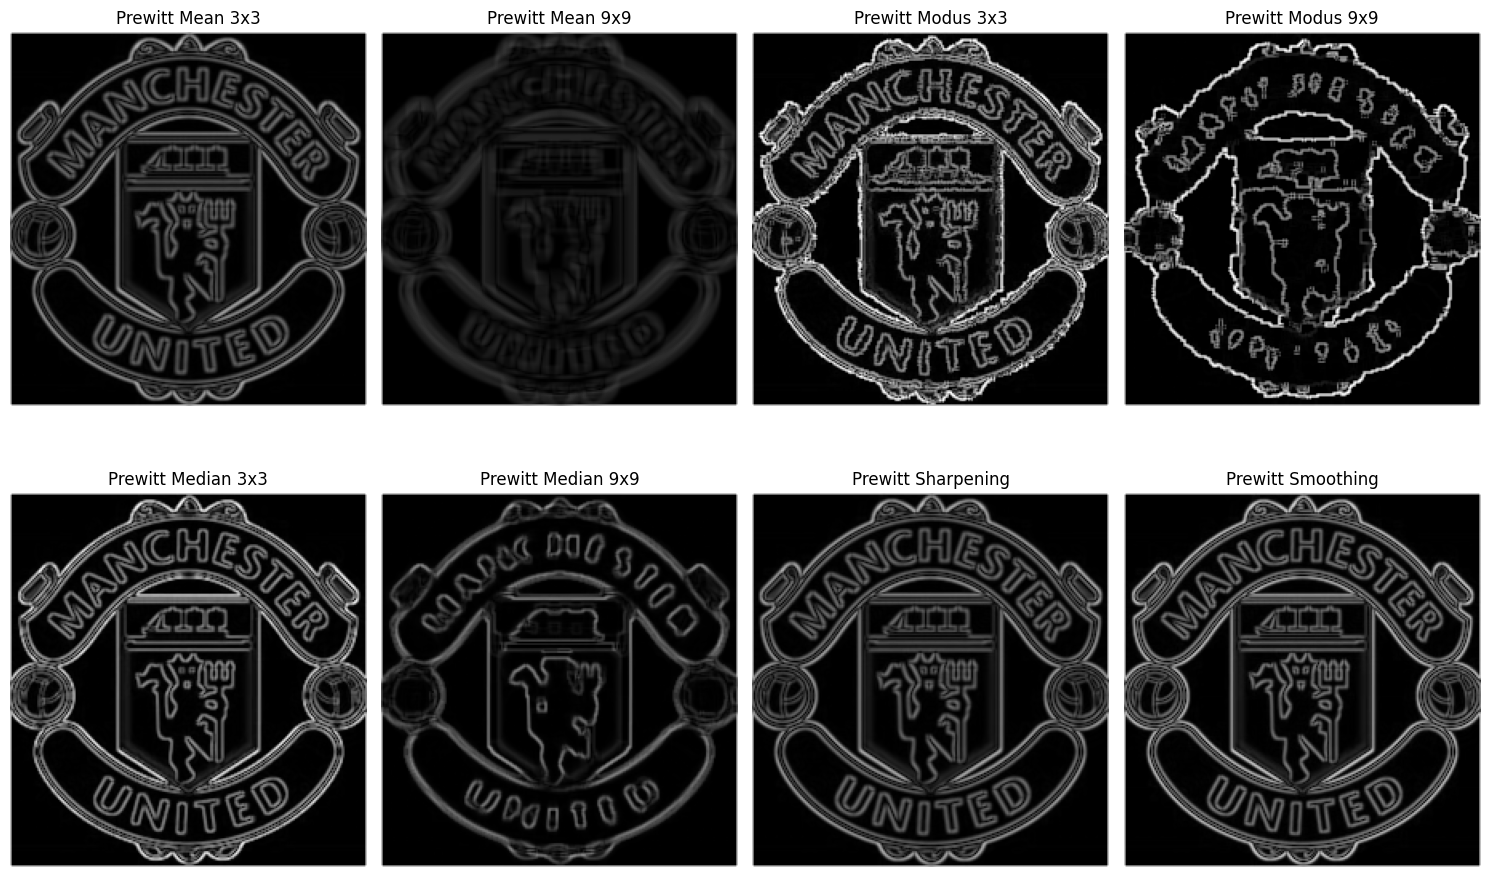

In [119]:
plt.figure(figsize=(15, 10))
prewittMean3 = deteksiTepi(mean1, Prewittx, Prewitty)
plt.subplot(241)
plt.imshow(prewittMean3, cmap='gray')
plt.title('Prewitt Mean 3x3')
plt.axis("off")

prewittMean9 = deteksiTepi(mean2, Prewittx, Prewitty)
plt.subplot(242)
plt.imshow(prewittMean9, cmap='gray')
plt.title('Prewitt Mean 9x9')
plt.axis("off")

prewittModus3 = deteksiTepi(modus1, Prewittx, Prewitty)
plt.subplot(243)
plt.imshow(prewittModus3, cmap='gray')
plt.title('Prewitt Modus 3x3')
plt.axis("off")

prewittModus9 = deteksiTepi(modus2, Prewittx, Prewitty)
plt.subplot(244)
plt.imshow(prewittModus9, cmap='gray')
plt.title('Prewitt Modus 9x9')
plt.axis("off")

prewittMedian3 = deteksiTepi(median1, Prewittx, Prewitty)
plt.subplot(245)
plt.imshow(prewittMedian3, cmap='gray')
plt.title('Prewitt Median 3x3')
plt.axis("off")

prewittMedian9 = deteksiTepi(median2, Prewittx, Prewitty)
plt.subplot(246)
plt.imshow(prewittMedian9, cmap='gray')
plt.title('Prewitt Median 9x9')
plt.axis("off")

prewittSharpening = deteksiTepi(sharpening, Prewittx, Prewitty)
plt.subplot(247)
plt.imshow(prewittSharp, cmap='gray')
plt.title('Prewitt Sharpening')
plt.axis("off")

prewittSmoothing = deteksiTepi(smoothing, Prewittx, Prewitty)
plt.subplot(248)
plt.imshow(prewittSmooth, cmap='gray')
plt.title('Prewitt Smoothing')
plt.axis("off")

plt.tight_layout()
plt.show()

Script dibawah ini digunakan untuk menampilkan hasil deteksi tepi menggunakan metode Robert. Script dibawh ini juga, menampilkan hasil perbaikan kualitas citra dengan menampilkan hasil mean, median, modus dengan kernel 3x3 dan 9x9. serta menampilkan hasil sharpening atau penghalusan citra dan smoothing atau penajaman citra.

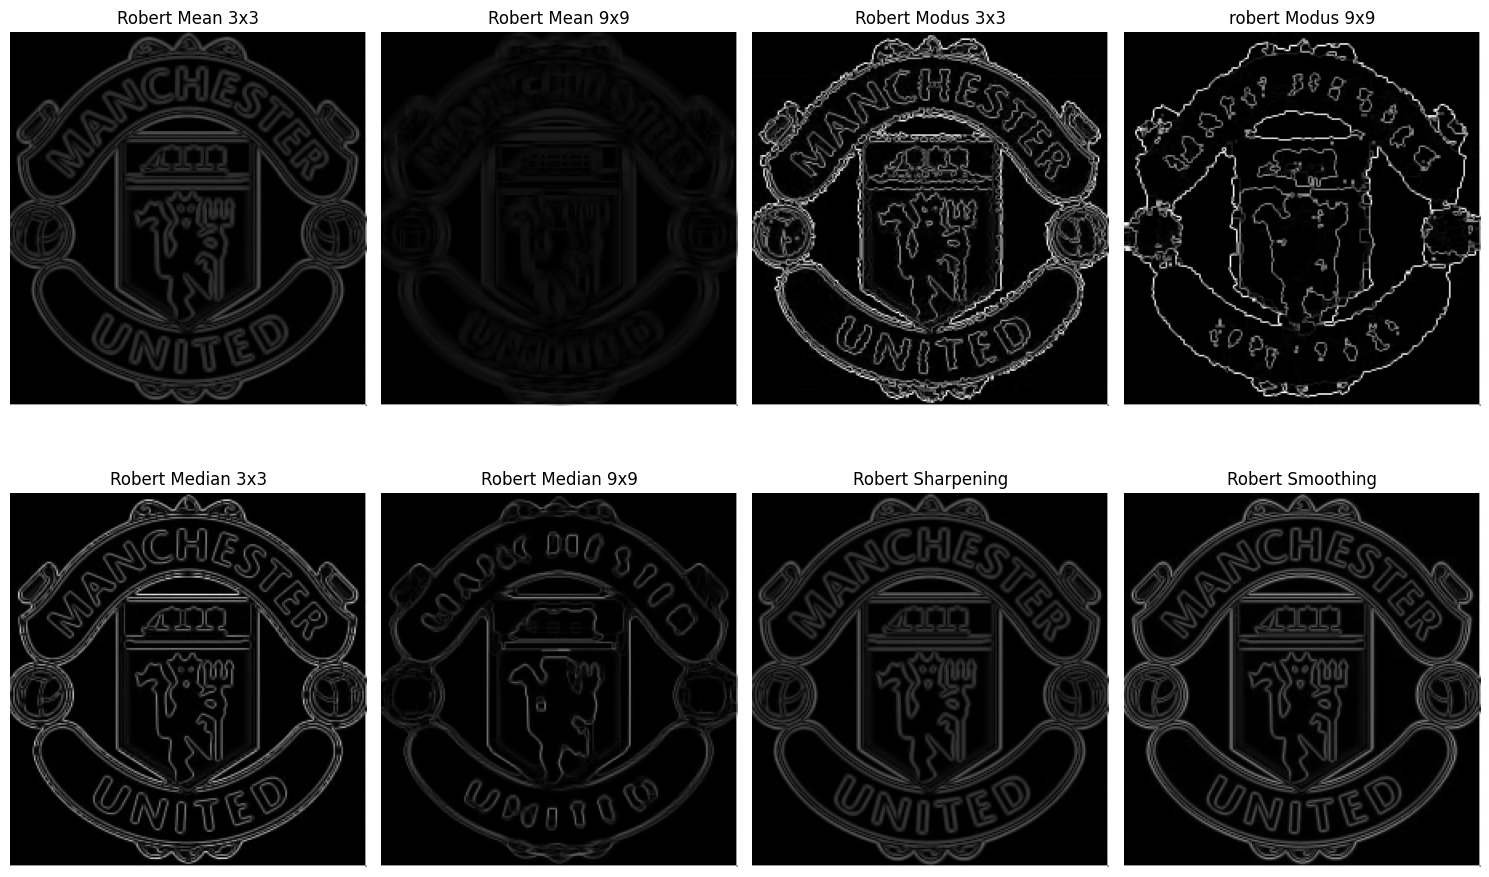

In [120]:
plt.figure(figsize=(15, 10))
robertMean3 = deteksiTepi(mean1, Robertx, Roberty)
plt.subplot(241)
plt.imshow(robertMean3, cmap='gray')
plt.title('Robert Mean 3x3')
plt.axis("off")

robertMean9 = deteksiTepi(mean2, Robertx, Roberty)
plt.subplot(242)
plt.imshow(robertMean9, cmap='gray')
plt.title('Robert Mean 9x9')
plt.axis("off")

robertModus3 = deteksiTepi(modus1, Robertx, Roberty)
plt.subplot(243)
plt.imshow(robertModus3, cmap='gray')
plt.title('Robert Modus 3x3')
plt.axis("off")

robertModus9 = deteksiTepi(modus2, Robertx, Roberty)
plt.subplot(244)
plt.imshow(robertModus9, cmap='gray')
plt.title('robert Modus 9x9')
plt.axis("off")

robertMedian3 = deteksiTepi(median1, Robertx, Roberty)
plt.subplot(245)
plt.imshow(robertMedian3, cmap='gray')
plt.title('Robert Median 3x3')
plt.axis("off")

robertMedian9 = deteksiTepi(median2, Robertx, Roberty)
plt.subplot(246)
plt.imshow(robertMedian9, cmap='gray')
plt.title('Robert Median 9x9')
plt.axis("off")

robertSharpening = deteksiTepi(sharpening, Robertx, Roberty)
plt.subplot(247)
plt.imshow(robertSharpening, cmap='gray')
plt.title('Robert Sharpening')
plt.axis("off")

robertSmoothing = deteksiTepi(smoothing, Robertx, Roberty)
plt.subplot(248)
plt.imshow(robertSmoothing, cmap='gray')
plt.title('Robert Smoothing')
plt.axis("off")

plt.tight_layout()
plt.show()